# Goodreads reviews EDA

In this notebook we analyse the dataset from goodreads published in kaggle (link)

## Main findings

- TODO

In [1]:
import pandas as pd
import seaborn as sns
import glob
import tqdm
sns.set(rc={'figure.figsize':(11.7,8.27)})

# 1) Load data and Overview

- Remove csv files that do not contain description

In [2]:
block_list = ['../data/book1-100k.csv',
              '../data/book100-200k.csv',
              '../data/book200-300k.csv',
              '../data/book300-400k.csv',
              '../data/book400-500k.csv',
              '../data/book500-600k.csv',
              ]
file_names = glob.glob('../data/book*.csv')

dfs = []

for file_name in tqdm.tqdm(file_names):
   if file_name not in block_list:
       df = pd.read_csv(file_name)
       if 'pagesNumber' in df.columns:
           df.rename(columns = {'pagesNumber' : 'PagesNumber'}, inplace=True)
       dfs.append(df)

df = pd.concat(dfs)
del dfs

100%|██████████| 23/23 [00:09<00:00,  2.33it/s]


In [3]:
df.size

35840360

In [4]:
df.dtypes

Id                         int64
Name                      object
Authors                   object
ISBN                      object
Rating                   float64
PublishYear                int64
PublishMonth               int64
PublishDay                 int64
Publisher                 object
RatingDist5               object
RatingDist4               object
RatingDist3               object
RatingDist2               object
RatingDist1               object
RatingDistTotal           object
CountsOfReview             int64
Language                  object
PagesNumber                int64
Description               object
Count of text reviews    float64
dtype: object

In [5]:
df.describe()

,Id,Rating,PublishYear,PublishMonth,PublishDay,CountsOfReview,PagesNumber,Count of text reviews
count,1.792018e+06,1.792018e+06,1.792018e+06,1.792018e+06,1.792018e+06,1.792018e+06,1.792018e+06,409697.000000
mean,2.178663e+06,2.869331e+00,1.997786e+03,7.619405e+00,8.038701e+00,7.149217e+00,2.759867e+02,7.172742
std,1.380094e+06,1.737683e+00,8.928656e+01,7.645796e+00,8.538634e+00,1.968291e+02,5.086590e+03,124.838833
min,1.000000e+05,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,9.204588e+05,0.000000e+00,1.993000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.440000e+02,0.000000
50%,2.081502e+06,3.670000e+00,2.000000e+03,6.000000e+00,5.000000e+00,0.000000e+00,2.380000e+02,1.000000
75%,3.242957e+06,4.000000e+00,2.005000e+03,1.100000e+01,1.100000e+01,1.000000e+00,3.360000e+02,3.000000
max,4.846451e+06,5.000000e+00,6.553500e+04,3.100000e+01,3.100000e+01,1.544470e+05,4.517845e+06,43652.000000


In [6]:
df.head()

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,PagesNumber,Description,Count of text reviews
0,1900511,Barbarossa,Christopher Ailsby,1840138009,3.0,2007,4,1,New Line Books,5:0,4:0,3:1,2:0,1:0,total:1,0,NaN,192,"On 22 June 1941, Adolf Hitler launched Operati...",NaN
1,1900512,Collector's Guide to German World War II: Comb...,Christopher Ailsby,0781802253,0.0,1994,7,1,Hippocrene Books,5:0,4:0,3:0,2:0,1:0,total:0,0,NaN,160,NaN,NaN
2,1900514,Images of Barbarossa,Christopher Ailsby,0711028257,3.5,2001,1,25,Ian Allan Ltd,5:0,4:5,3:2,2:1,1:0,total:8,0,NaN,256,"On 22 June 1941, Adolf Hitler launched Operati...",NaN
3,1900520,Romania After 2000: Five New Romanian Plays,Daniel Charles Gerould,0595436560,4.0,2007,9,1,Martin E. Segal Theatre Center Publications,5:1,4:4,3:1,2:0,1:0,total:6,0,NaN,226,The first anthology of new Romanian Drama publ...,NaN
4,1900521,Global Foreigners: An Anthology of Plays,Saviana Stănescu,1905422423,4.6,2006,12,7,Seagull Books,5:4,4:0,3:1,2:0,1:0,total:5,0,NaN,320,"In Waxing West, Daniella, newly arrived in the...",NaN


# 2) Check for Duplications

- There are no fully duplicated rows

In [7]:
df.duplicated(keep=False).sum()

0

# 3) Check & Address NaN

In [8]:
df.isna().sum()

Id                             0
Name                           0
Authors                        0
ISBN                        5377
Rating                         0
PublishYear                    0
PublishMonth                   0
PublishDay                     0
Publisher                  17332
RatingDist5                    0
RatingDist4                    0
RatingDist3                    0
RatingDist2                    0
RatingDist1                    0
RatingDistTotal                0
CountsOfReview                 0
Language                 1560490
PagesNumber                    0
Description               620830
Count of text reviews    1382321
dtype: int64

## Publisher:

- If publisher is NaN, it's usually classics or religious (e.g. the Bible, or Plato's Republic)

In [9]:
df[df['Publisher'].isna()]['Name'].head(10)

368                           Lost Dimension Zero Gravity
381                                  écureuil noir: roman
382                                     Le Roman Colonial
524     Memorial Volumes to Jewish Communities Destroy...
585                                      Without Feathers
590     Guidelines for drinking-water quality. First a...
746                              Die Herrin von Sherwood.
765                          Building Geographic Literacy
812                               Mundo del fin del mundo
1006               America's History Through Young Voices
Name: Name, dtype: object

- We have decided to encode NaN Publisher values as "Unknown"

In [10]:
print(df['Publisher'].isna().sum().astype(str) + ' NaN values replaced by "Unknown"')
df['Publisher'] = df['Publisher'].fillna("Unknown")

17332 NaN values replaced by "Unknown"


## Language:



- The majority of the titles of the dataset are in English.

In [11]:
df['Language'].value_counts().head(10)

eng      164350
en-US     19033
fre       15996
ger       11261
en-GB      7342
spa        6608
jpn        2005
ita        1120
mul         388
por         382
Name: Language, dtype: int64

- We have applied a heuristic tool with the most popular English stopwords to check if the Name (Title) of books with NaN values for Language contained them. The vast majority did.

In [12]:
import spacy
from spacy.lang.en import STOP_WORDS

eng_stop_words = spacy.lang.en.STOP_WORDS
nan_language_books = df[df['Language'].isna()]

def contains_eng_stopword(name):
    return any(word in name for word in eng_stop_words)

eng_counter = nan_language_books.Name.apply(contains_eng_stopword).sum()

print(f' {round(eng_counter*100/len(nan_language_books), 2)} % of books with NaN values for Language contained English stopwords.')

 99.15 % of books with NaN values for Language contained English stopwords.


- With the two considerations above, we have decided to encode NaN "Language" values as "eng"

In [13]:
print(df['Language'].isna().sum().astype(str) + ' NaN values replaced by "eng"')
df['Language'] = df['Language'].fillna('eng')

1560490 NaN values replaced by "eng"


- After checking unique values for "Language", we have also decided to encode all variations of English as "eng"

In [14]:
df['Language'].unique()

array(['eng', 'en-US', 'en-GB', 'fre', 'spa', 'swe', 'ger', 'ita', 'sco',
       'rum', 'pol', 'jpn', 'nl', 'por', 'zho', 'kor', 'ind', 'lat',
       'gmh', 'msa', 'mul', 'per', 'eus', 'nor', 'wel', 'enm', 'rus',
       'grc', 'ara', 'ave', 'tur', 'epo', 'dan', 'mga', 'gla', 'gre',
       'scr', 'fin', 'gle', 'en-CA', 'srp', 'isl', 'tha', 'urd', 'cze',
       'glg', 'frs', 'wak', 'heb', 'hun', 'guj', 'chp', 'raj', 'hin',
       'cat', 'ang', 'afr', 'ypk', 'frm', 'nav', 'myn', 'elx', 'tlh',
       'tah', 'slv', 'bul', 'slo', 'mar', 'tli', 'san', 'cop', 'tel',
       'gem', 'haw', 'tib', 'sam', '--', 'fan', 'est', 'lav', 'yid',
       'nld', 'tgl', 'hye', 'sqi', 'ben', 'mal', 'ada', 'zap', 'aus',
       'kur', 'nob', 'nep', 'nai', 'lit', 'fro', 'bos', 'hmn', 'cre',
       'nub', 'tam', 'lao', 'fil', 'nqo', 'chi', 'som', 'rar', 'vie',
       'goh', 'jav', 'mri', 'che', 'sna', 'aze', 'myv', 'zul', 'ira',
       'ssw', 'mis', 'zun', 'dum', 'mah', 'kan', 'non'], dtype=object)

In [15]:
language_mask = df['Language'].str.startswith('en-')
english_varieties = df.loc[language_mask, 'Language']
print(english_varieties.count().astype(str) + ' values standardised as "eng"')
english_varieties = 'eng'

26442 values standardised as "eng"


- To simplify the scope of this project, we will drop all entries that are not in English

In [16]:
print(df['Language'][df.Language != 'eng'].count().astype(str) + ' non-English books removed"')
df = df.drop(df[df.Language != 'eng'].index)

67178 non-English books removed"


## ISBN

- This column is not relevant for the analysis, so we have decided to drop it.

In [17]:
df = df.drop(columns='ISBN')

## Descriptions
- Check if books without description are duplicated in the dataset (Name)

In [18]:
print(f'{round(df.Description.isna().sum()*100/df.size, 2)}% of the books in the dataset lack a description')

1.74% of the books in the dataset lack a description


In [19]:
books_unique_names_na_description = df[df['Description'].isna()].Name.unique()
books_with_description = df[~df.Description.isna()]
books_with_description_which_appear_also_without_description = books_with_description[books_with_description.Name.isin(books_unique_names_na_description)].Name.unique()


print(f'{round(books_with_description_which_appear_also_without_description.size *100 /  books_unique_names_na_description.size, 2)} % of the books with NaN descriptions have a repetition with description')

6.59 % of the books with NaN descriptions have a repetition with description


- We are dropping books without description from the dataset.

In [20]:
df.dropna(subset= 'Description', inplace=True)

# 3) Check dates and replace by datetime format

## Months & Days
- Month and date are noisy variables and have format problems, so we will drop both columns.

In [21]:
df = df.drop(columns=['PublishMonth', 'PublishDay'])

## Year

- Remove all rows with year before the minimum of timestamp (1677)

In [22]:
print(f"Books before {pd.Timestamp.min.year} dropped: {(df['PublishYear'] <= pd.Timestamp.min.year).sum()}")

Books before 1677 dropped: 3


In [23]:
df = df.drop(df[df['PublishYear'] <= pd.Timestamp.min.year].index)

- Remove all rows with year after the current (probably wrong data)

In [24]:
from datetime import date
print(f"Books after {date.today().year} dropped: {(df['PublishYear'] >= date.today().year).sum()}")

Books after 2022 dropped: 8


In [25]:
df = df.drop(df[df['PublishYear'] >= date.today().year].index)

<AxesSubplot: >

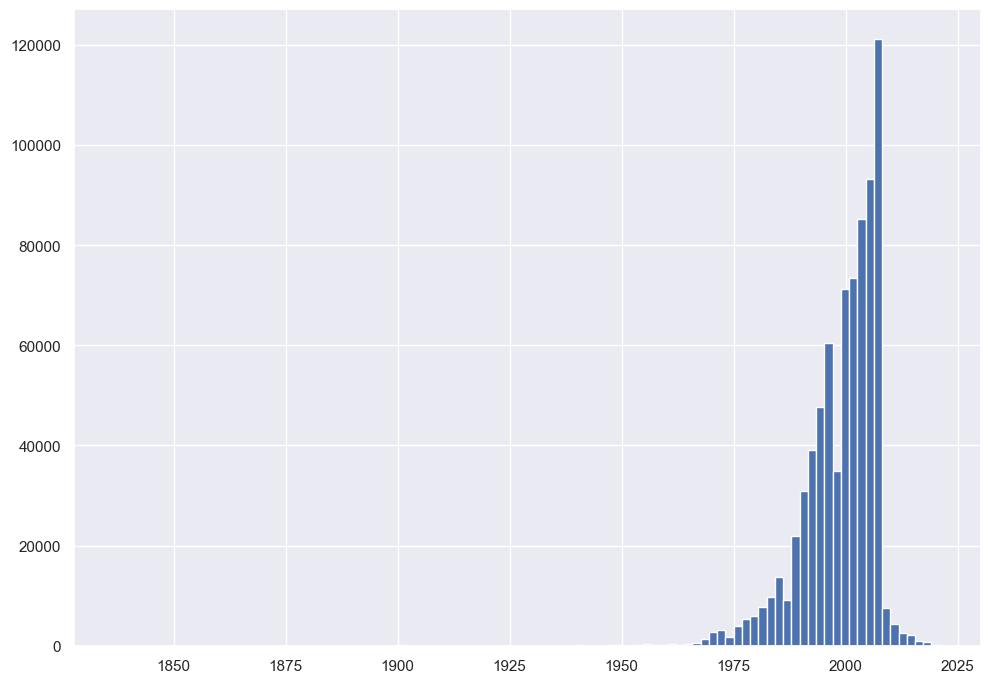

In [26]:
df.PublishYear.hist(bins=100)

- Convert year to datetime format

In [27]:
df['PublishYear'] = pd.to_datetime(df['PublishYear'], format='%Y')

# 4) Cleaning RatingDistTotal

- Remove "total:" from column and convert to int.

In [28]:
df['RatingDistTotal'] = df['RatingDistTotal'].str.replace("total:", "").astype(int)

# 5) Questions about the data

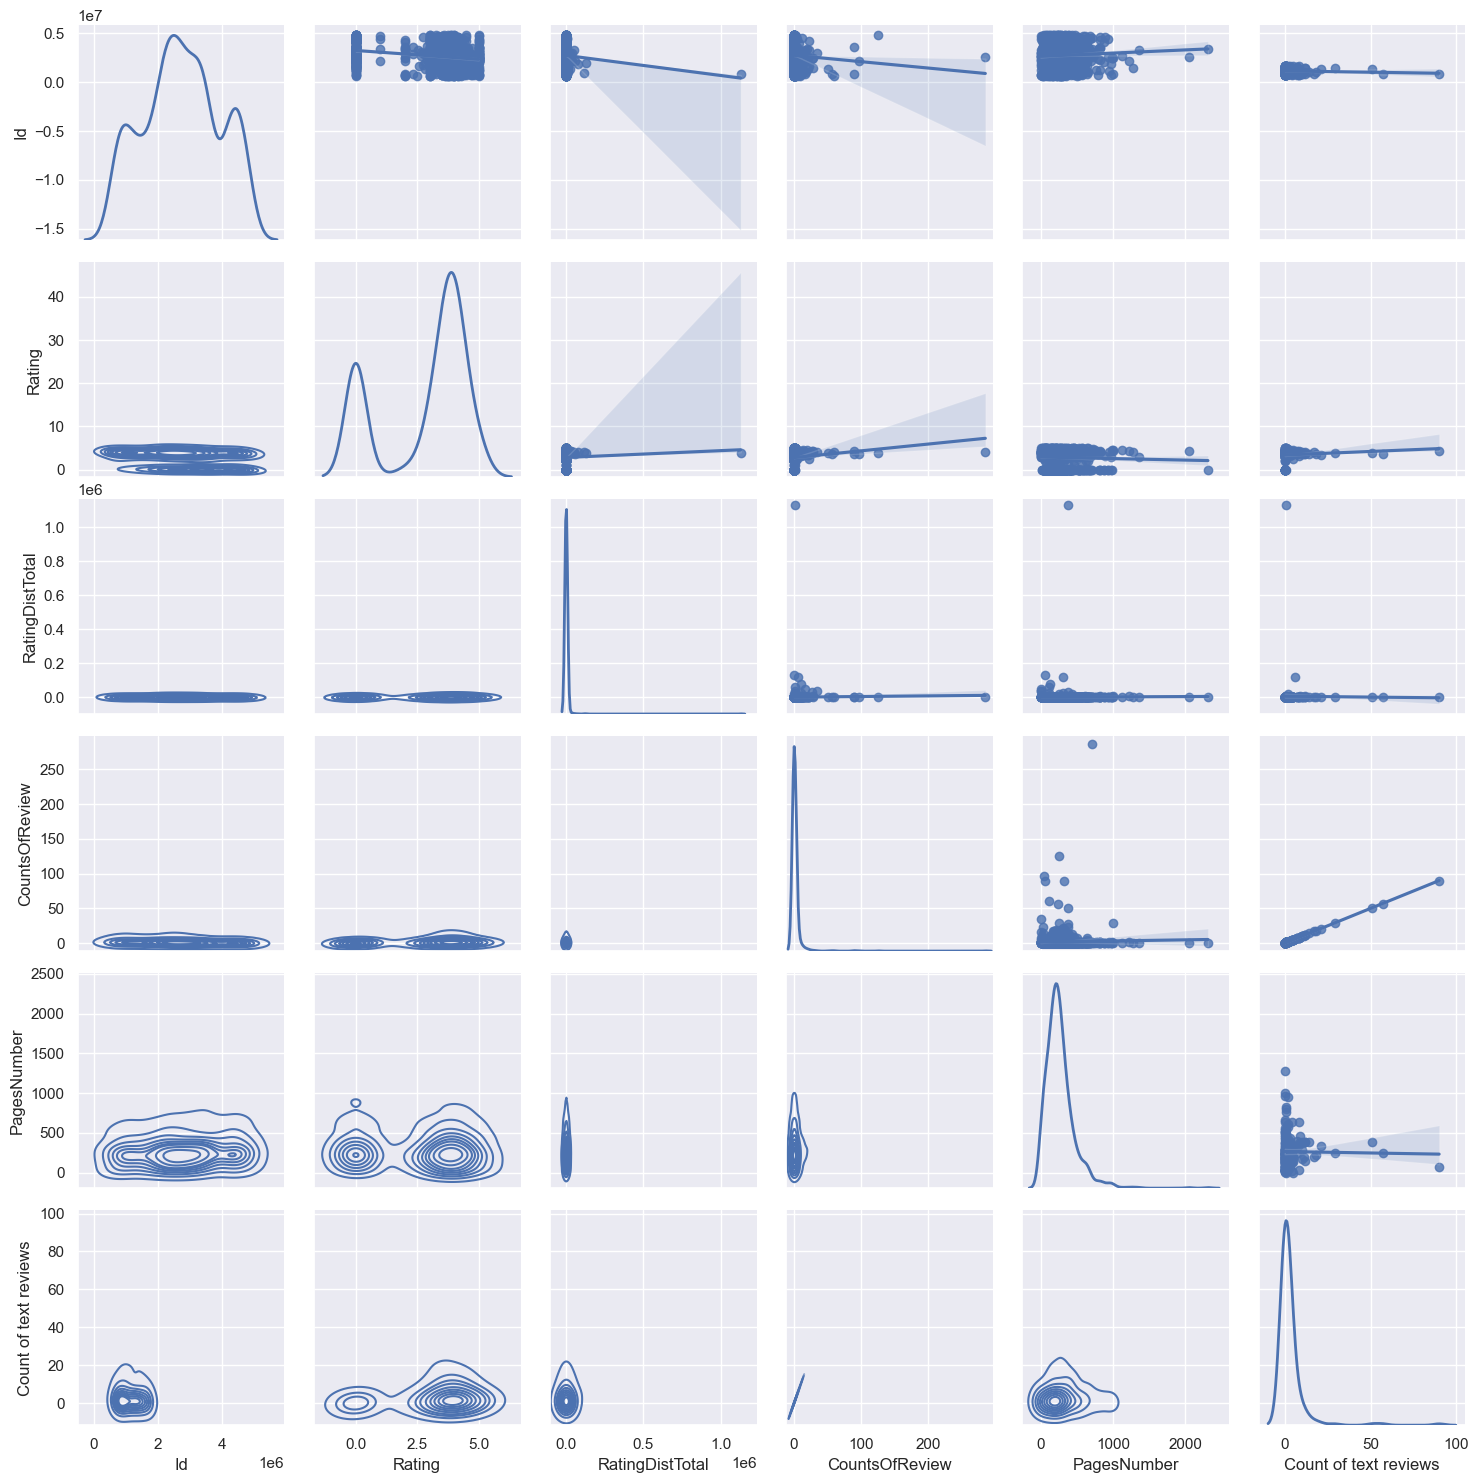

In [29]:
g = sns.PairGrid(df.sample(1000), diag_sharey=False)
g.map_upper(sns.regplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

- Who are the top 5 most rated authors?

In [30]:
df.groupby('Authors')['RatingDistTotal'].sum().sort_values(ascending = False).head()

Authors
William Shakespeare    86859285
J.K. Rowling           48576555
Jane Austen            42304135
J.R.R. Tolkien         37824211
George Orwell          34079630
Name: RatingDistTotal, dtype: int64

- How many different publishers are there?

In [31]:
df['Publisher'].nunique()

33260

- Who are the top 5 publishers (most published books)?

In [32]:
df.pivot_table(index=['Publisher'], aggfunc ='size').sort_values(ascending=False).head()

Publisher
Springer                                                      22375
Routledge                                                     22197
Cambridge University Press                                    14714
Oxford University Press, USA                                  13759
Peter Lang Gmbh, Internationaler Verlag Der Wissenschaften     8078
dtype: int64

- Which are the top 5 longest books in the dataset?

In [33]:
df[['PagesNumber', 'Name']].sort_values(by=['PagesNumber'], ascending=False).head()

,PagesNumber,Name
31537,56086,2007 Cia World Factbook Updated Guide To The...
97563,41349,2008 Cyber Guide to Anti-Submarine Warfare and...
113151,31150,Air Travel Security And The Transportation Sec...
361524,29935,Mars 2004 - 21st Century Complete Guide to Mar...
198960,22100,"Classics in Psychology, 1855-1914"


- What is the average/median rating of all books?

In [34]:
df['Rating'].describe()

count    765772.000000
mean          2.810033
std           1.763361
min           0.000000
25%           0.000000
50%           3.630000
75%           4.000000
max           5.000000
Name: Rating, dtype: float64

- Does publisher explain the rating?

[Text(0, 0, 'Turtleback Books'),
 Text(1, 0, 'Thorndike Press'),
 Text(2, 0, 'University of California Press'),
 Text(3, 0, 'HarperCollins Publishers'),
 Text(4, 0, 'Yale University Press'),
 Text(5, 0, 'Dover Publications'),
 Text(6, 0, 'University of Chicago Press'),
 Text(7, 0, 'Kessinger Publishing'),
 Text(8, 0, 'Princeton University Press'),
 Text(9, 0, "St. Martin's Press"),
 Text(10, 0, 'Unknown'),
 Text(11, 0, 'Oxford University Press, USA'),
 Text(12, 0, 'State University of New York Press'),
 Text(13, 0, 'Prentice Hall'),
 Text(14, 0, 'Cambridge University Press'),
 Text(15, 0, 'Rowman & Littlefield Publishers'),
 Text(16, 0, 'McGraw-Hill Companies'),
 Text(17, 0, 'John Wiley & Sons'),
 Text(18, 0, 'Wiley-Blackwell'),
 Text(19, 0, 'Palgrave Macmillan'),
 Text(20, 0, 'Sage Publications, Inc'),
 Text(21, 0, 'Routledge'),
 Text(22, 0, 'Wiley'),
 Text(23, 0, 'iUniverse'),
 Text(24, 0, 'Praeger'),
 Text(25, 0, 'Authorhouse'),
 Text(26, 0, 'CRC Press'),
 Text(27, 0, 'University Pr

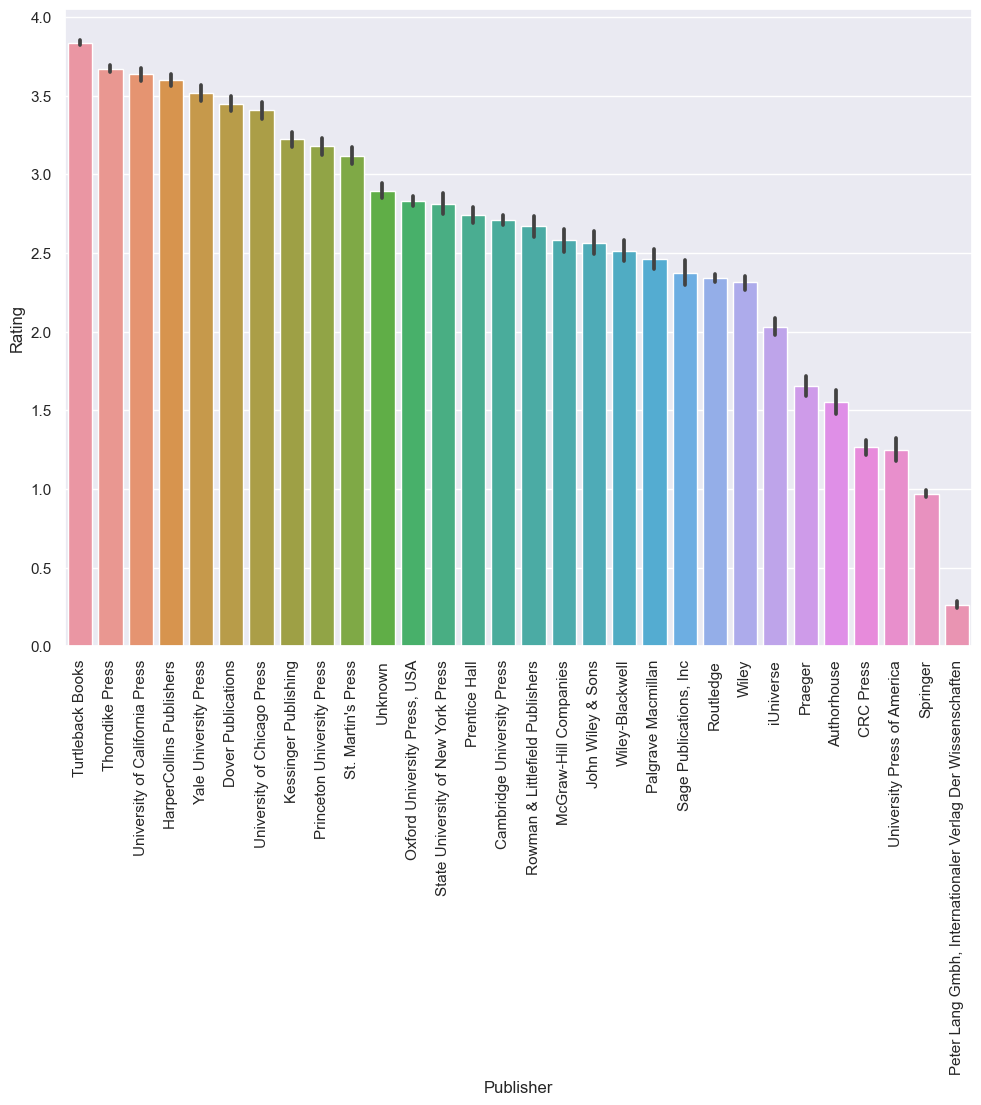

In [35]:
top_publishers = df.pivot_table(index=['Publisher'], aggfunc ='size').sort_values(ascending=False).head(30)
books_from_top_publishers = df[df['Publisher'].isin(top_publishers.index)]
publishers_in_desc_order = books_from_top_publishers.groupby('Publisher').Rating.mean().sort_values(ascending=False).index

g = sns.barplot(data=books_from_top_publishers, 
                x='Publisher', 
                y='Rating',  
                order=publishers_in_desc_order)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

- Does publisher explain amount of reviews?

[Text(0, 0, 'Turtleback Books'),
 Text(1, 0, 'Thorndike Press'),
 Text(2, 0, 'Unknown'),
 Text(3, 0, 'HarperCollins Publishers'),
 Text(4, 0, 'Kessinger Publishing'),
 Text(5, 0, 'Dover Publications'),
 Text(6, 0, "St. Martin's Press"),
 Text(7, 0, 'Cambridge University Press'),
 Text(8, 0, 'University Press of America'),
 Text(9, 0, 'Oxford University Press, USA'),
 Text(10, 0, 'Yale University Press'),
 Text(11, 0, 'Palgrave Macmillan'),
 Text(12, 0, 'Authorhouse'),
 Text(13, 0, 'iUniverse'),
 Text(14, 0, 'Prentice Hall'),
 Text(15, 0, 'University of California Press'),
 Text(16, 0, 'University of Chicago Press'),
 Text(17, 0, 'Princeton University Press'),
 Text(18, 0, 'Rowman & Littlefield Publishers'),
 Text(19, 0, 'McGraw-Hill Companies'),
 Text(20, 0, 'Routledge'),
 Text(21, 0, 'State University of New York Press'),
 Text(22, 0, 'John Wiley & Sons'),
 Text(23, 0, 'Wiley'),
 Text(24, 0, 'Wiley-Blackwell'),
 Text(25, 0, 'Springer'),
 Text(26, 0, 'Praeger'),
 Text(27, 0, 'Peter Lan

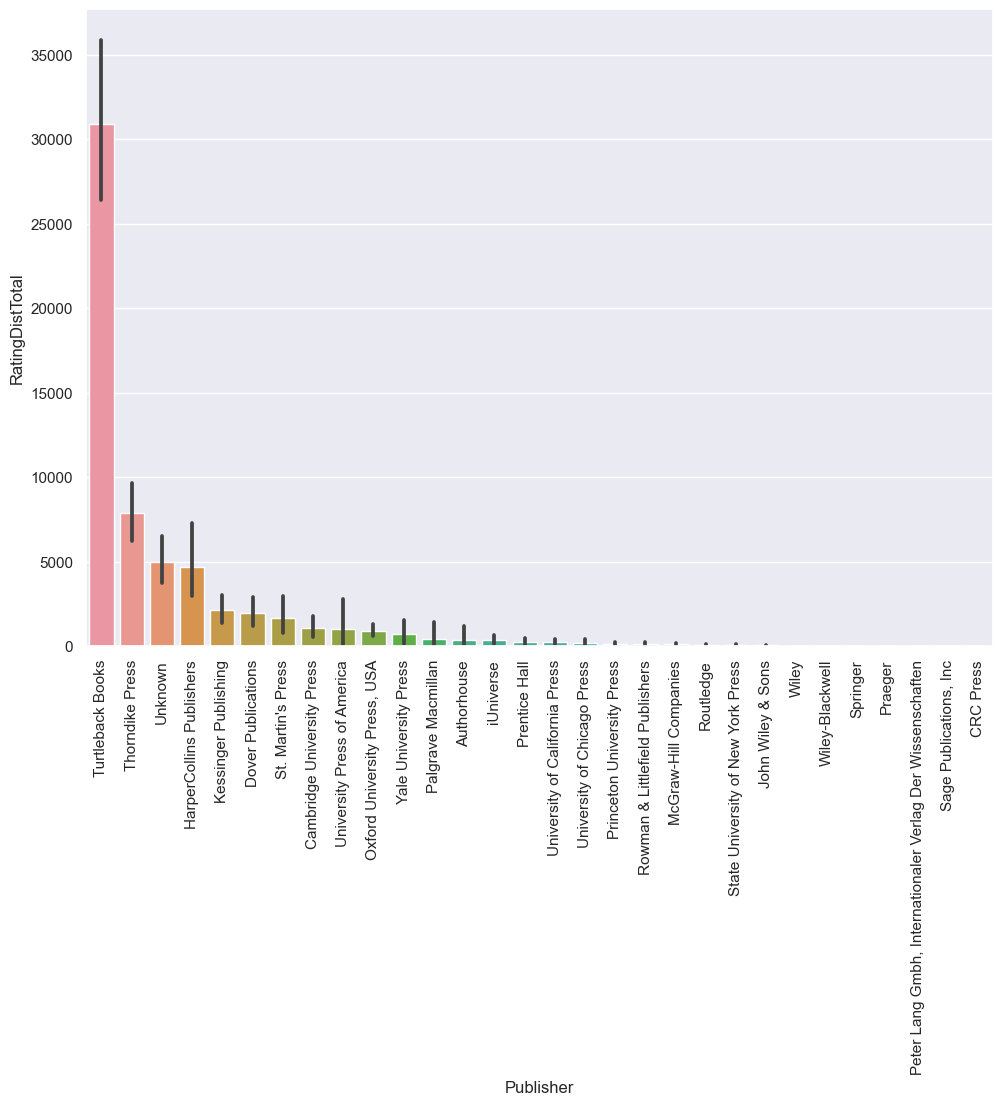

In [36]:
publishers_in_desc_order = books_from_top_publishers.groupby('Publisher').RatingDistTotal.mean().sort_values(ascending=False).index

g = sns.barplot(data=books_from_top_publishers, 
                x='Publisher', 
                y='RatingDistTotal',
                order=publishers_in_desc_order)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

- Does the number of pages impact the amount of reviews?

[(0.0, 5000.0)]

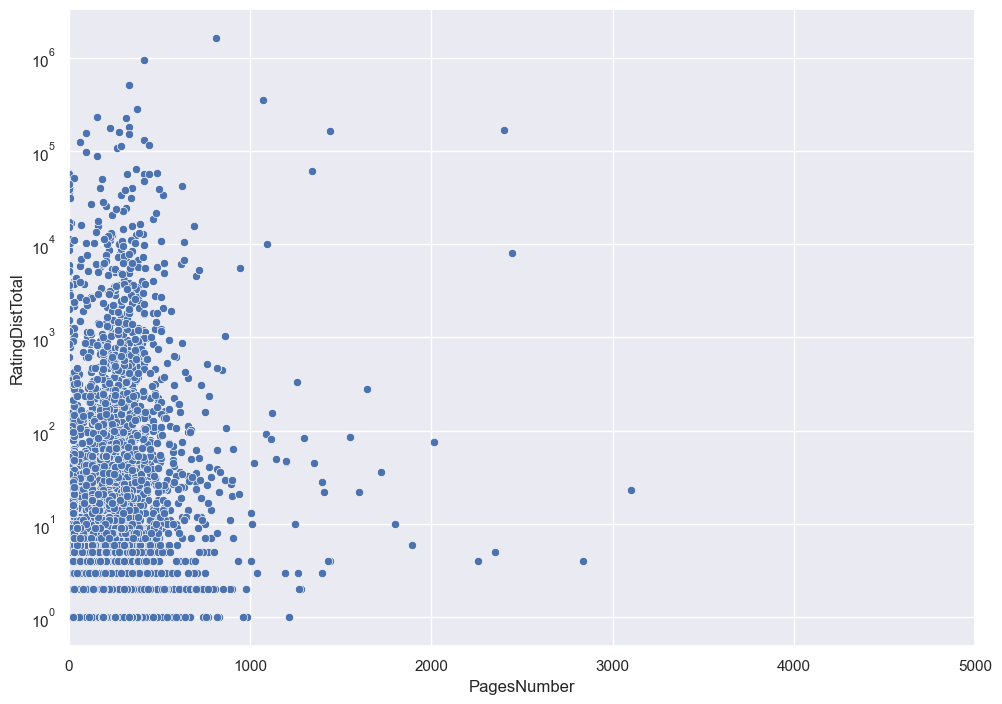

In [37]:
g = sns.scatterplot(data=df.sample(5000),
                x='PagesNumber',
                y='RatingDistTotal')
g.set(yscale='log')
# g.set(ylim=(0, ))
g.set(xlim=(0, 5000))

- Does the number of reviews impact the rating?

[(0.0, 10000.0)]

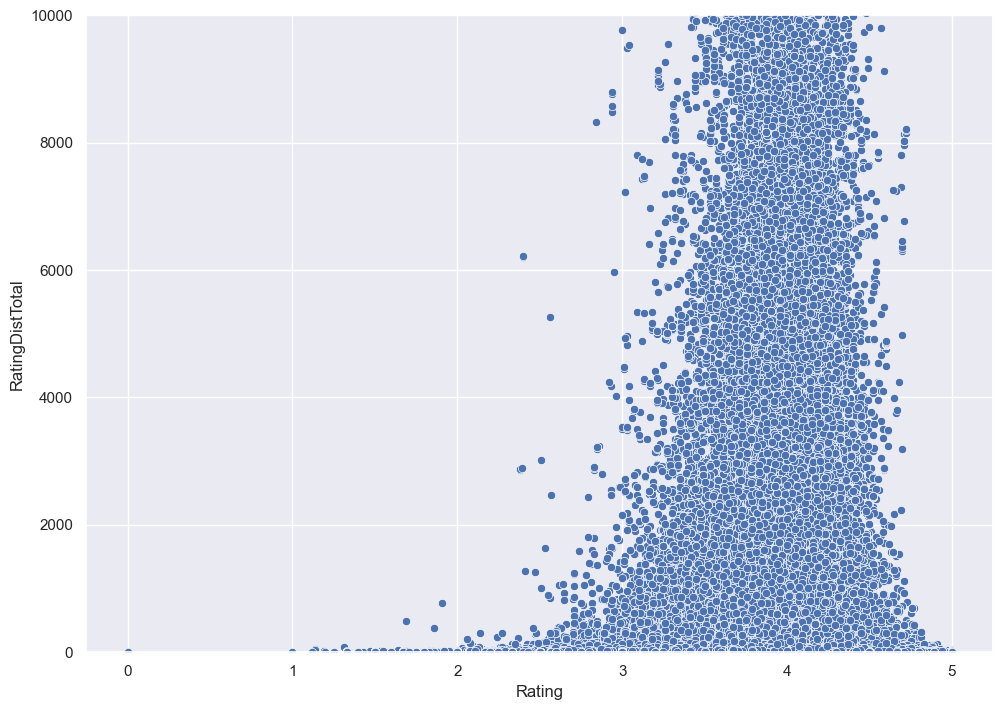

In [38]:
g = sns.scatterplot(data=df,
                x='Rating',
                y='RatingDistTotal')
g.set(ylim=(0, 10000))

- Is there a relationship between time since publication and amount of reviews?

[(1900, 21988.25)]

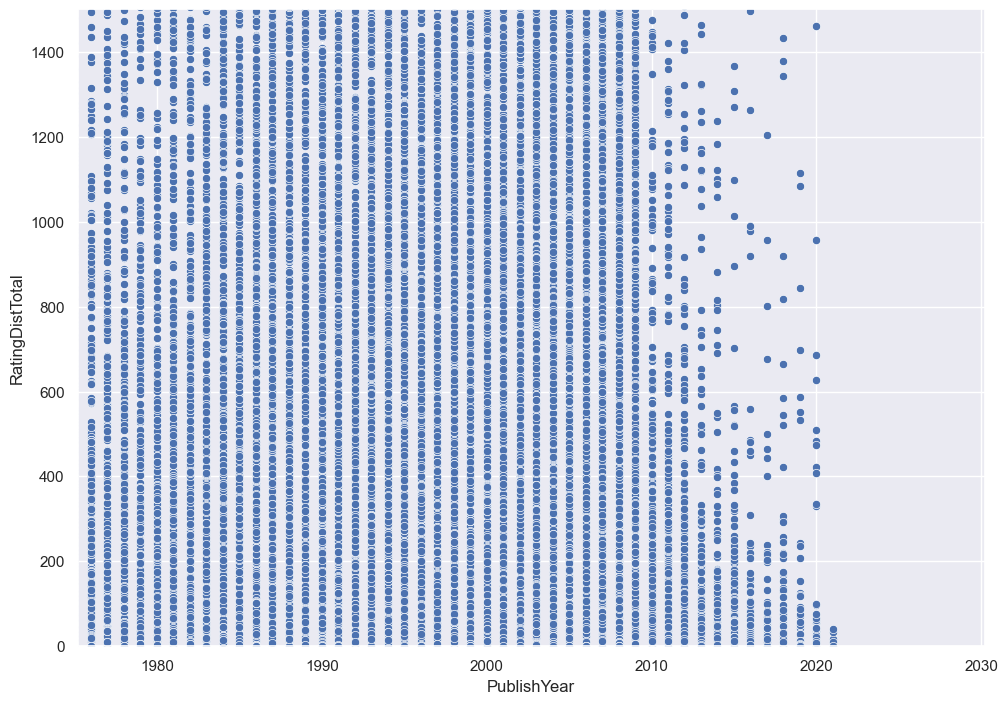

In [39]:
g = sns.scatterplot(data=df,
                x='PublishYear',
                y='RatingDistTotal')
g.set(ylim=(0, 1500))
g.set(xlim=(1900, None))

In [39]:
df['Name']